<a href="https://colab.research.google.com/github/lala991204/pandas/blob/master/7_3_multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1~3] 데이터 준비
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pandas/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True)          # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)       # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')          # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]  # 종속 변수(Y): 'mag' 열, 독립 변수(X): 'cylinders', 'horsepower', 'weight' 열 (후보들) -> 변수 간에 선형관계 봐야함

'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]     # 독립 변수 X1, X2, X3
y=ndf[['mpg']]        # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,                # 독립 변수
                                                    y,                # 종속 변수
                                                    test_size=0.3,    # 검증 30%
                                                    random_state=10)  # 랜덤 추출 값
                                                    
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [2]:
'''
[Step 5] 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수형 b', lr.intercept_)

0.6939048496695599


X 변수의 계수 a:  [[-0.60691288 -0.03714088 -0.00522268]]


상수형 b [46.41435127]


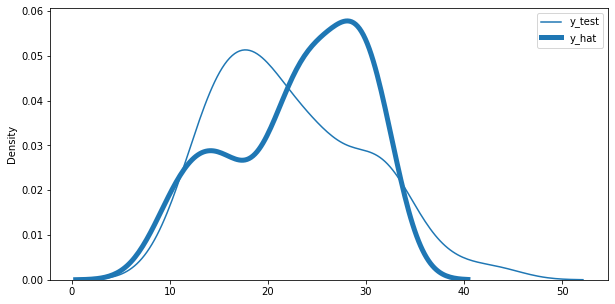

In [4]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(data=y_test, label="y_test")
ax2 = sns.kdeplot(data=y_hat, label="y_hat", linewidth=5, ax=ax1)
plt.legend()
plt.show()